# Evaluation of model

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras.optimizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Layer,add,Input,concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import pickle
import numpy as np
from tensorflow.keras.layers import Lambda
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import pandas as pd


In [2]:
X_train = pickle.load(open("X_train", "rb"))/255.0
X_test = pickle.load(open("X_test", "rb"))/255.0
y_train = pickle.load(open("y_train", "rb"))
y_test = pickle.load(open("y_test", "rb"))

In [3]:
model=tf.keras.models.load_model('difker_best.h5')

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 96) 960         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 96) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 96)   0           activation[0][0]                 
______________________________________________________________________________________________

In [5]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [6]:
#accuracy,presicion,recall,f1
acc_train = accuracy_score(y_train, train_pred.round())
acc_test = accuracy_score(y_test, test_pred.round())
print("Train accuracy: ", acc_train)
print("Test accuracy: ", acc_test)

pres_train = precision_score(y_train, train_pred.round())
pres_test = precision_score(y_test, test_pred.round())
print("Train presicion: ", pres_train)
print("Test presicion: ", pres_test)

rec_train = recall_score(y_train, train_pred.round())
rec_test = recall_score(y_test, test_pred.round())
print("Train recall: ", rec_train)
print("Test recall: ", rec_test)

f1_train = f1_score(y_train, train_pred.round())
f1_test = f1_score(y_test, test_pred.round())
print("Train f1: ", f1_train)
print("Test f1: ", f1_test)


Train accuracy:  0.9996135585734791
Test accuracy:  0.9400463729711825
Train presicion:  1.0
Test presicion:  0.950561797752809
Train recall:  0.9992197949175212
Test recall:  0.9290577641115748
Train f1:  0.999609745219379
Test f1:  0.9396867710763079


In [9]:
df=pd.DataFrame({'Train':[acc_train,pres_train,rec_train,f1_train],'Test':[acc_test,pres_test,rec_test,f1_test]},index=['Accuracy','Precision','Recall','F1'])
df

,Train,Test
Accuracy,0.999614,0.940046
Precision,1.000000,0.950562
Recall,0.999220,0.929058
F1,0.999610,0.939687


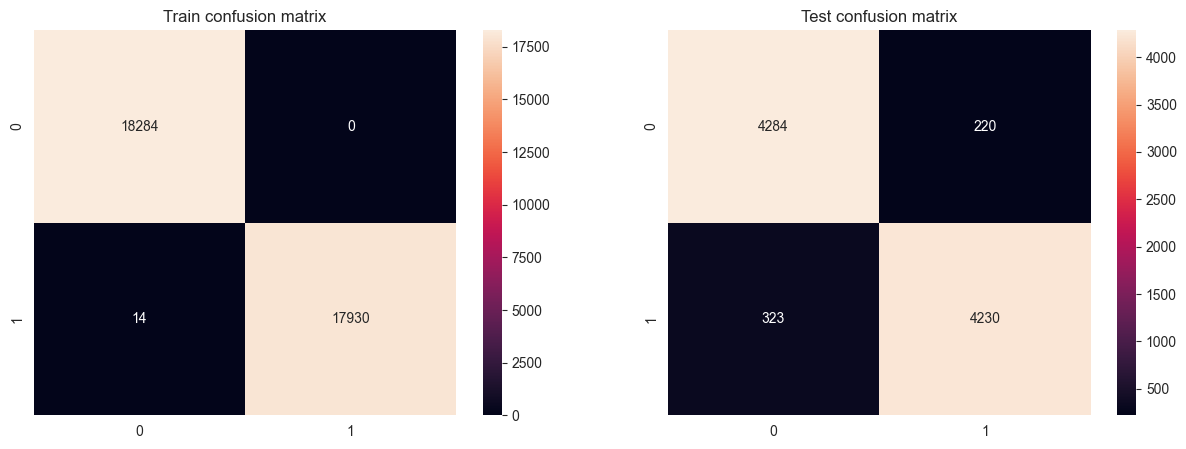

In [7]:
#confusion matrix
cm_train = confusion_matrix(y_train, train_pred.round())
cm_test = confusion_matrix(y_test, test_pred.round())
f=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(cm_train, annot=True, ax=f[1][0], fmt='g')
sns.heatmap(cm_test, annot=True, ax=f[1][1], fmt='g')
f[1][0].set_title('Train confusion matrix')
f[1][1].set_title('Test confusion matrix')
plt.show()

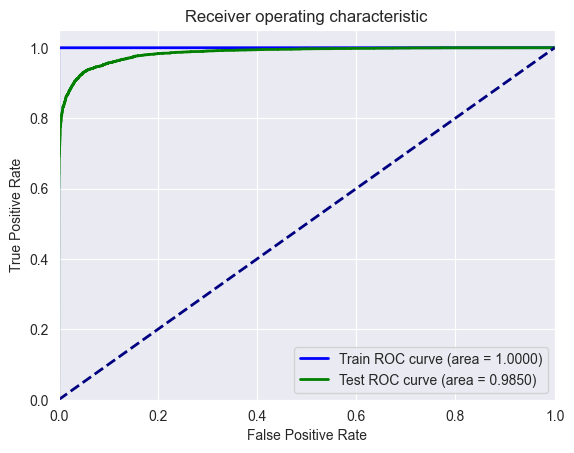

In [10]:
#roc curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_pred)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.4f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Test ROC curve (area = %0.4f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
